Name: Rohith Suresh

UB # 50314902

# **Imports**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
import pprint 

# **Environment**

The first class is for defining the environment. It holds all the important information of the environment such as the action space and the observation space. 

The reset() function bring all the values of the environment to the initial position

The takestep() function takes the input for the action to be taken and performs the action. After this function, the agent changes its position.

The state [1,1] can be made Stocastic in this program. There is a 5% stocasticity for the agent to enter the cell

The element can be made Deterministic/Stocastic by using the Boolean variable below.

The default reward for all the states except the goal([2,2]) is 0.
The goal has a reward +1

The start position is [0,0] and the goal is [2,2]

In [0]:
STOCASTIC = True  # this variable sets the stocasticity of the envirionment. 
#This can be set to False to make the environment Deterministic

In [0]:

class GridEnv(gym.Env):
  metadata = { 'render.modes': [] }

  def __init__(self):  
    self.env_reward = 0 
    self.actions_do = ["u","d","l","r"]
    self.the_end = False
 
  def reset(self):
    self.agent_pos = [0,0]
    self.goal_pos = [2,2]

  def step(self,action): 
    self.env_reward = 0
    if action == "d":             #down
      self.agent_pos[0] += 1
      self.agent_pos = np.clip(self.agent_pos, 0, 2)

      if(STOCASTIC == True):  
        if(self.agent_pos == [1,1]).all():
          if(np.random.uniform(0,1) < 0.05):
            self.agent_pos[0] -= 1

    elif action == "u":           #up
      self.agent_pos[0] -= 1
      self.agent_pos = np.clip(self.agent_pos, 0, 2)

      if(STOCASTIC == True):  
        if(self.agent_pos == [1,1]).all():
          if(np.random.uniform(0,1) < 0.05):
            self.agent_pos[0] += 1
      
    elif action == "r":           #right
      self.agent_pos[1] += 1
      self.agent_pos = np.clip(self.agent_pos, 0, 2)

      if(STOCASTIC == True):  
        if(self.agent_pos == [1,1]).all():
          if(np.random.uniform(0,1) < 0.05):
            self.agent_pos[1] -= 1

    elif action == "l":           #left
      self.agent_pos[1] -= 1
      self.agent_pos = np.clip(self.agent_pos, 0, 2)

      if(STOCASTIC == True):  
        if(self.agent_pos == [1,1]).all():
          if(np.random.uniform(0,1) < 0.05):
            self.agent_pos[1] += 1

    if (self.agent_pos == self.goal_pos).all(): #Checking if the agent reached the goal
      self.env_reward = 1
      self.the_end = True #Setting the flag to indicate that this episode is sucessful i.e the agent has reached the goal

    return self.env_reward 


Agent

This class also has a __init__ function() like the Environment.

This class also makes an instance of the Environment Class and uses some of its variables like the action space values.

The most important function here is choosing the action to be taken by the agent.

The action is being choosen keeping in mind the balance bet Exploration and Eploitation. The exploration rate starts at 100% and decreases at a rate of 0.09% every 50 epochs. Once the exploration rate goes below 0 (0%)it makes no difference if the values is negative. This only means that the agent will only exploit from that point on.

The exploitation is done withe Q-Learning formula and it chooses the action with the highest Q-Value. This helps the agent reach its goal.
 



In [0]:
class RandAgent:
  
  def __init__(self,env):
    self.env = env
    self.action_space = env.action_space #instance of Environment
    self.explore = 1 #Exploration rate

  def takestep(self,epoch):  
    max_next_reward = 0
    if (epoch % 50 == 0): #Exploration rate decay
      self.explore -= 0.0009
    if np.random.uniform(0,1) <= explore: #Exploration
      return np.random.choice(self.env.actions_do)
    else: # Exploitation
      for a in self.env.actions_do:
        current_position = self.env.agent_pos
        next_reward = Q_value[tuple(current_position)][a] 
        if next_reward >= max_next_reward:
          max_next_reward = next_reward
          agent_action = a
    return(agent_action)

# **Main**



This is where all the class creaded above are called and used.

The Q-learning formula is applies and the values are stored in the Q-table. These values will help the agent makethe decision on what action to take in exploitation and also traing the agent.

There is also a small task being performed in the end of the program with the values in the Q-table. This is done because something when the epoch is set to a high value( > 700), the Q-Values become very high and confuing to read. Hence, I am reducing the size of the value.

Also the print for the Q-table is commented by default. It is in the bottom of the the cell, the last line of code.

*Also, the code here will be using backpropagation to update the values fof the Q table. This is because, in this program only the goal has a non-zero value and only when the agent reachs the goal can any proper updayion be made. So, there are dictonaries that store the steps taken by the agent to reach the goal and then calculates the Q-Values backwards i.e by backproapgation.  * 


In [0]:
pp = pprint.PrettyPrinter(indent=4)

env = GridEnv() #instance of Environment class
agent = RandAgent(env) #instance of Agent class
env.reset() 
epoch = 1200 #####Sets the number of epochs.
gamma = 0.8 #Discount Factor/Decay Rate
learning_rate = 0.1 #as the variable says, it is the learning rate
steps_taken = [] # used to store the steps taken by the agent in that episode
temp_steps = []  # if the agent reachs the goal in that episode then the steps are stored inthis variable to Perform Q-Learning
result = 0 #variable used in the Q-Learning formula below
iterations = 2  # Both this and the varible below are used to keep-----
explore = 0.5   # -----a track of and limit the steps of the agent.

#init Qtable
Q_value = {} 
for i in range(3):
  for j in range(3): 
    Q_value[(i,j)] = {}  
    for a in env.actions_do:
      Q_value[(i,j)][a] = 0 # initialize all the values to 0

while i < epoch:  
  for tsteps in range(4):
    if env.the_end: # checking if the agent reached the goal
      reward = env.env_reward 
      for a in env.actions_do:
        Q_value[tuple(env.agent_pos)][a] = round(reward,3) 
        next_position = round(Q_value[tuple(env.agent_pos)][a],3)
      for s in reversed(temp_steps): # Using back propagation to set the Q table values(EXPLAINED IN THE DESCRIPTION ABOVE)
        temp_s = str(tuple(s[0]))
        current_Qval = round(Q_value[tuple(s[0])][s[1]],3)  
        result = (1-learning_rate)*current_Qval + learning_rate*(result +  gamma* next_position) # Updating the Q value
        Q_value[tuple(s[0])][s[1]] = round(result,3)
        next_position = round(Q_value[tuple(s[0])][s[1]],3)
      env.reset()
      env.the_end = False #Starting the episode form the beginning
      i += 1

    else:
      if( iterations == 5 ):
        steps_taken = [] #holds the steps in that episode
        env.reset() 
        iterations = 1
      action = agent.takestep(epoch)  # the action is decided
      steps_taken.append([np.clip((env.agent_pos),0,2), action]) #steps is taken here
      reward = env.step(action) 
      if(env.agent_pos == env.goal_pos ).all(): # this block is used to transfer the steps taken to reach the goal(when reached)
        temp_steps = steps_taken                # to a differet variable and free the steps_taken vatriable
        steps_taken = []
      iterations += 1

if (epoch > 800): #When the episode/epochs cross 800, the Q-values become very large. So, this code is used.
  for i in range(3):
    for j in range(3):
      for a in env.actions_do:
        Q_value[(i,j)][a] = round((Q_value[(i,j)][a])/pow(10,12), 4) 


env.reset()

######################################################
# the line below can be uncommented to display the Q-Table
# pp.pprint(Q_value)  
######################################################

# Traversing



This cell has the code to watch the agent use the Q-Table to traverse the Gridworld and reach the goal. All the function have been implemented here again to avaid confusion. They have the same functionalities as the previous funstions seen. 
Matplotlib is being used to diplay the agent's movement

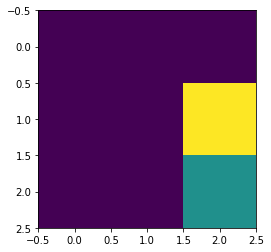

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

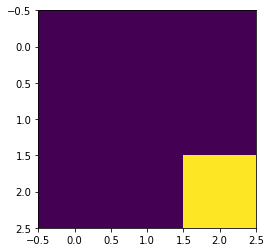

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

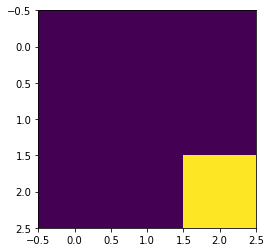

<IPython.core.display.Javascript object>

In [453]:
#Initializing all the variables used in this block
location = [0,0]
destination = [2,2]
color = np.zeros((3,3))
fin = 0
color[0,0] = 1
color[2,2] = 0.5

def traverse():
  mr = 0
  for act in env.actions_do:
    position_of_the_agent = location 
    r = Q_value[tuple(position_of_the_agent)][act] #Choosing the action with the highest Q-Value to choose the action.(Exploitation)
    if r >= mr:
      mr = r
      ag_act = act
  return ag_act

def move(movement): # Function to take the action i.e for the agent to move
  fin = False
  if movement == 'u':
    location[0] -= 1
  if movement == 'd':
    location[0] += 1
  if movement == 'l':
    location[1] -= 1
  if movement == 'r':
    location[1] += 1

  # setting the location of the agent in the Grid interface
  if (location == destination):
    color[tuple(location)] = 1 
  else:
    color[tuple(location)] = 1
    color[tuple(destination)] = 0.5
  return location
  
def show():  #funcion to create the Grid interface
  plt.imshow(color)

output_grid = widgets.Grid(1, 1)

with output_grid.output_to(0, 0):#Initail display of the Grid Interface
  output_grid.clear_cell()
  show()
  # time.sleep(1)
  
  

while not fin: # checking if the agent reached the goal
  time.sleep(0.5)
  color = np.zeros((3,3))
  acti = traverse()
  p = move(acti)

  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    show()

  
  if (p == destination): # setting flag for reaching the goal
    fin = True